In [1]:
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon, LineString
from tqdm.auto import tqdm
import shapely.speedups
shapely.speedups.enable() 
import warnings
warnings.filterwarnings('ignore')


/tmp/ipykernel_18971/2188583316.py:11: DeprecationWarning: This function has no longer any effect, and will be removed in a future release. Starting with Shapely 2.0, equivalent speedups are always available
  shapely.speedups.enable()


In [2]:
PLACE_NAME_list = ['Berlin, Germany', 
                   'Saarbrücken, Saarland, Germany',
                   'Munich, Germany',
                   'Frankfurt, Germany',
                   'Karlsruhe.Germany',
                    'Stuttgart, Germany',
                    'Trier, Germany',
                    'Mainz, Germany',
                    'Kaiserslautern, Germany',
    ]

In [3]:
city = ox.geocode_to_gdf(PLACE_NAME_list[0])
print(city.crs)

epsg:4326


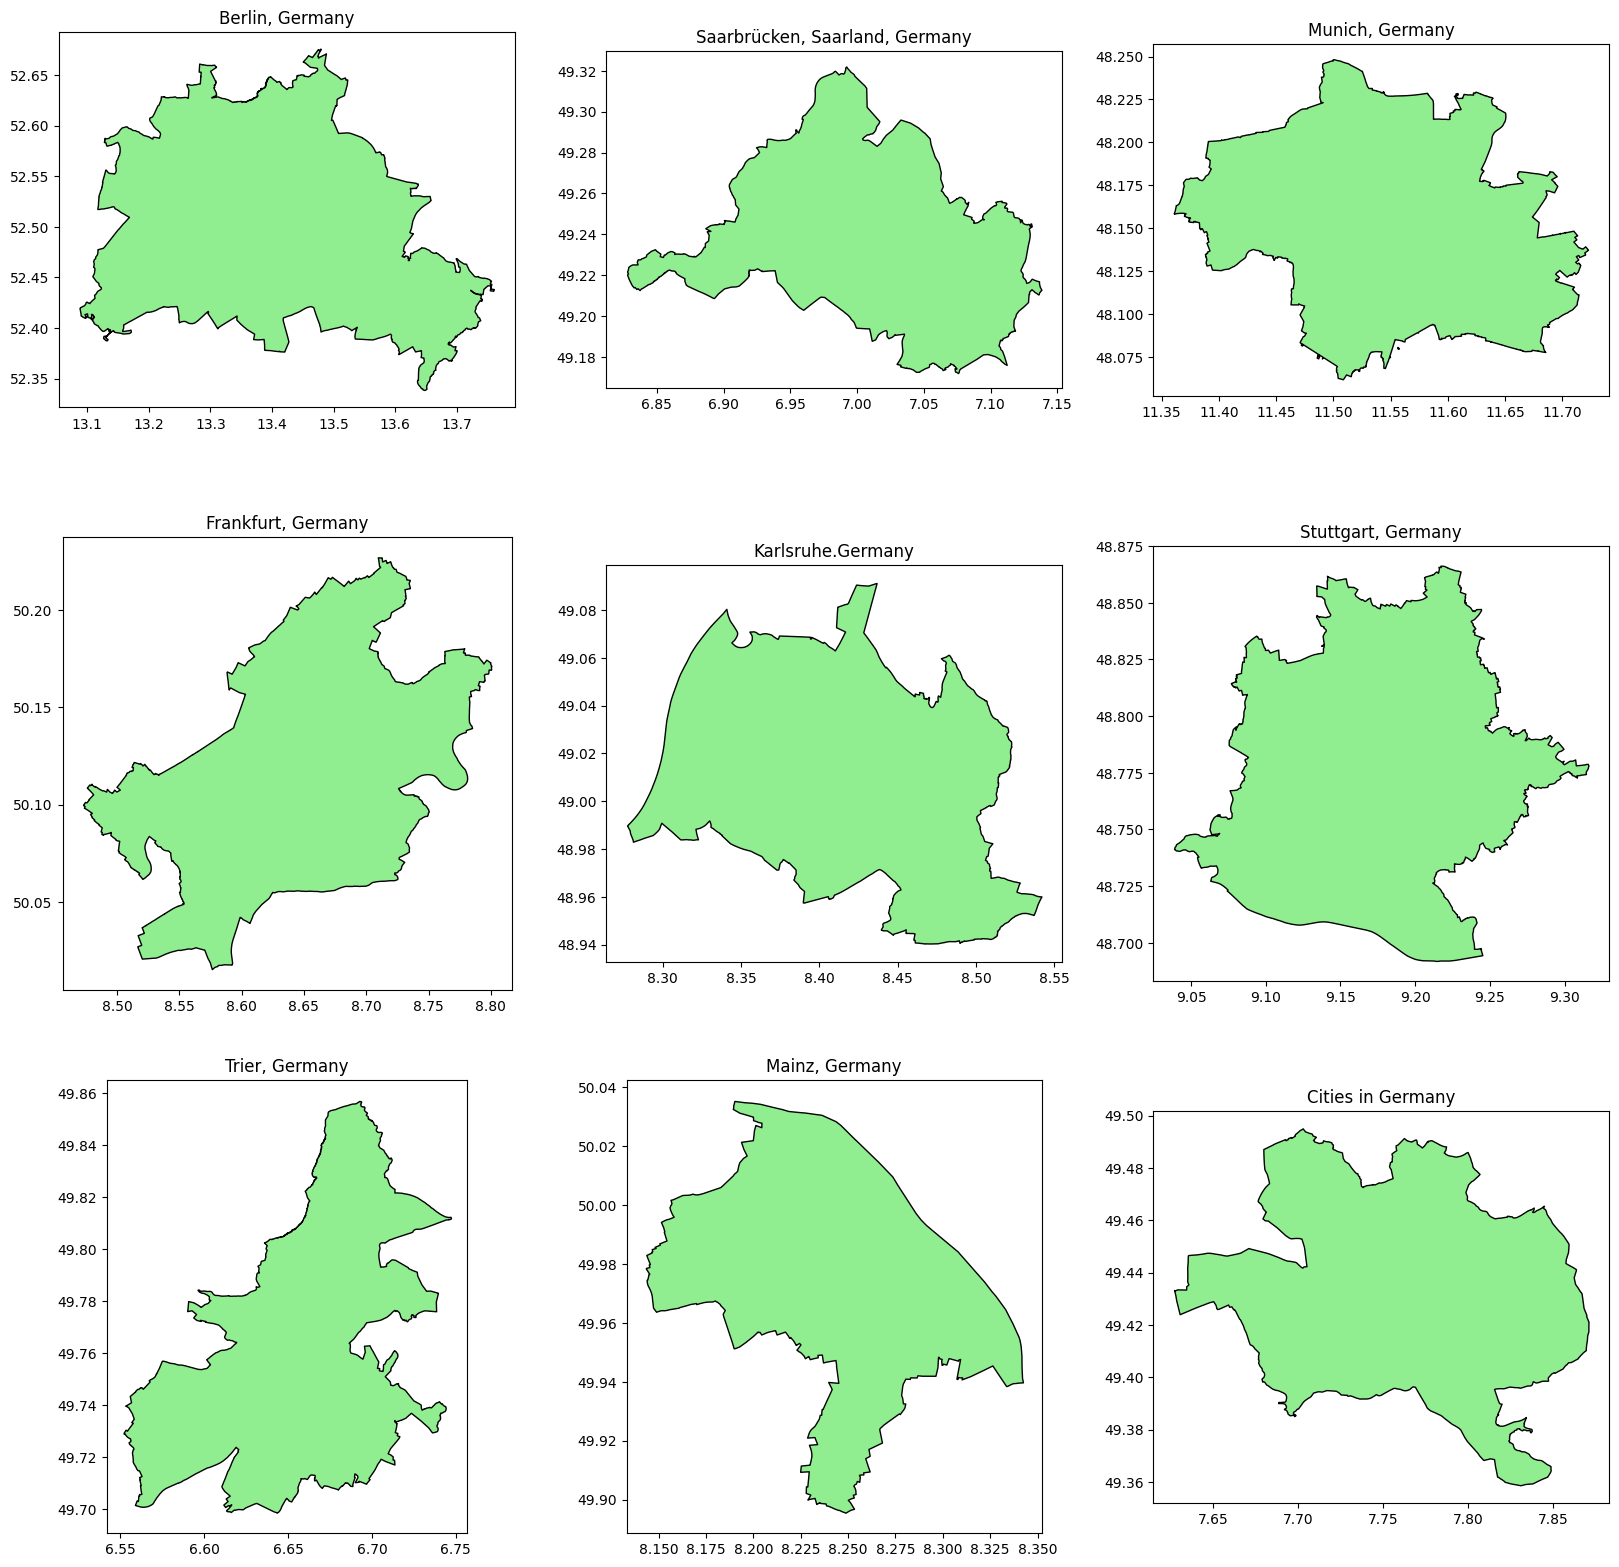

In [27]:
#Plot all the cities in the list as sublots
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flatten()
for i, place in enumerate(PLACE_NAME_list):
    city = ox.geocode_to_gdf(place)
    city.plot(ax=ax[i], color='lightgreen', edgecolor='black')
    ax[i].set_title(place)
plt.title('Cities in Germany')
plt.savefig('../figures/cities.png')
plt.show()

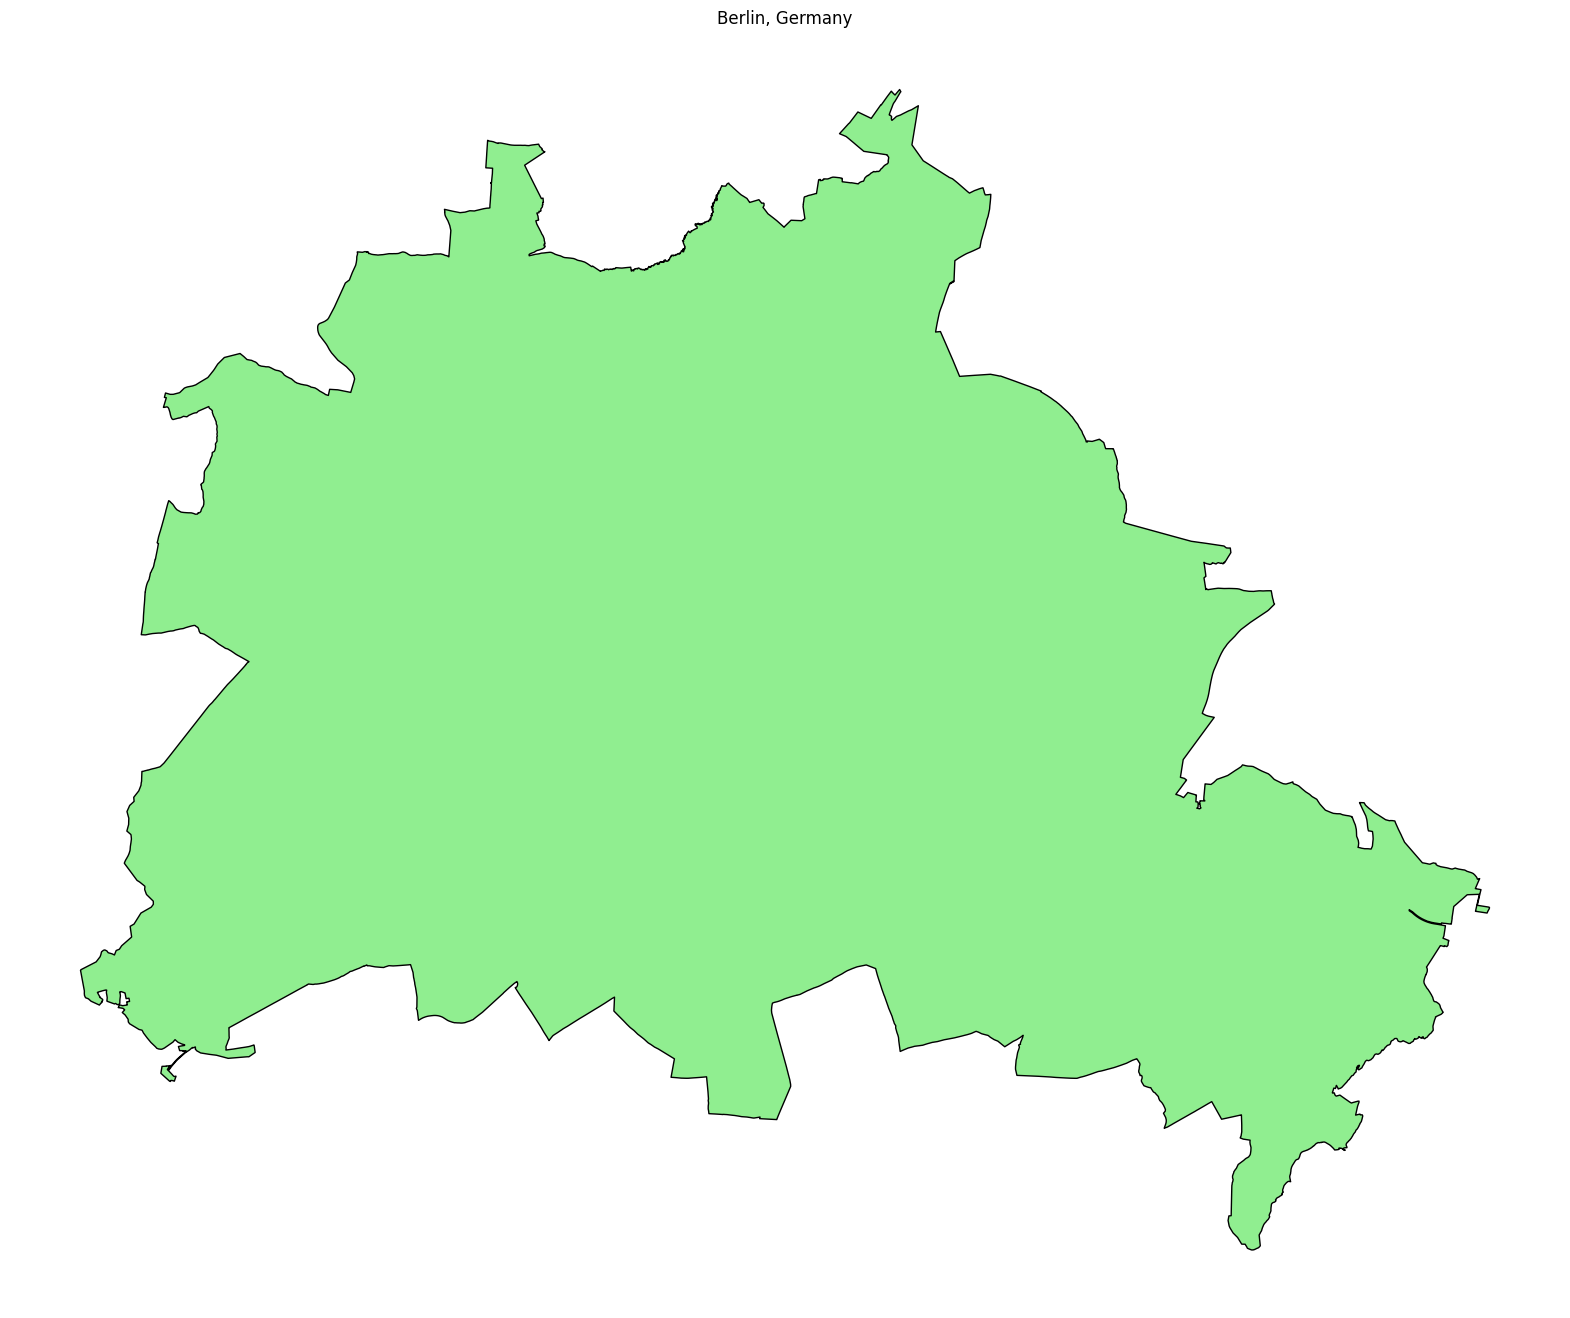

In [4]:
#Plot the city of Berlin 
fig, ax = plt.subplots(figsize=(20,20))
city = ox.geocode_to_gdf(PLACE_NAME_list[0])
city.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.set_title(PLACE_NAME_list[0])
ax.set_axis_off()
plt.savefig('../figures/berlin.png')

In [5]:
city = ox.project_gdf(city) 
print(city.crs)
geometry = city['geometry'].iloc[0]
print(type(geometry))
grid_size = 500
geometry_cut = ox.utils_geo._quadrat_cut_geometry(geometry, quadrat_width=grid_size) #500 Meter grid
print(type(geometry_cut))
polylist = [poly for poly in geometry_cut.geoms]

+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>


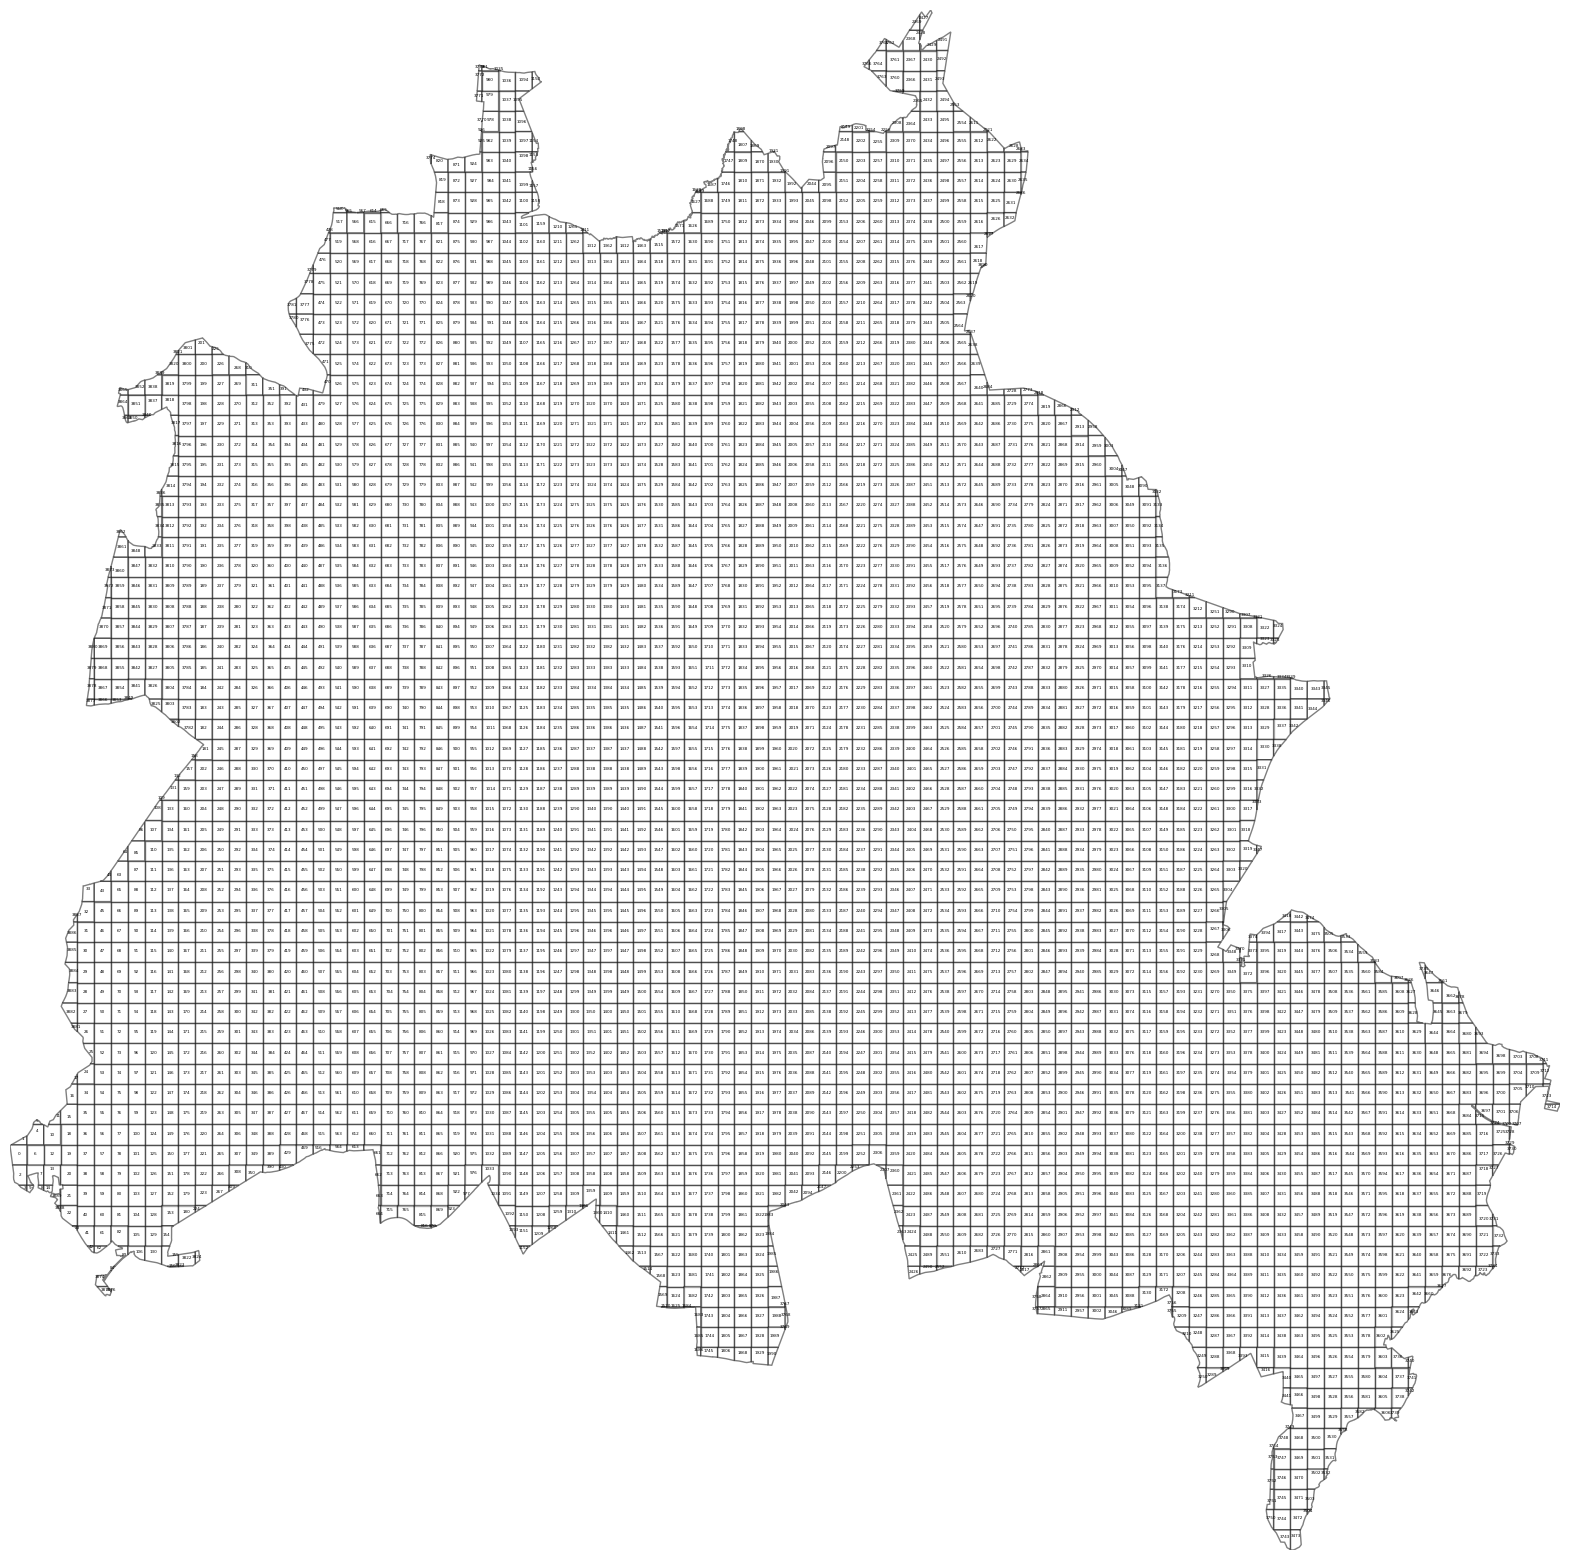

In [8]:
polylist = [poly for poly in geometry_cut.geoms]
# plot city
west, south, east, north = city.unary_union.bounds

fig, ax = plt.subplots(figsize=(20,20))
for polygon, n in zip(geometry_cut.geoms, np.arange(len(polylist))):
    p = polygon.representative_point().coords[:][0]
    patch = PolygonPatch(polygon, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2)
    ax.add_patch(patch)
    plt.annotate(text=n, xy=p, horizontalalignment='center', size=3)
    
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


(6861517.043822598, 6923199.923088058)

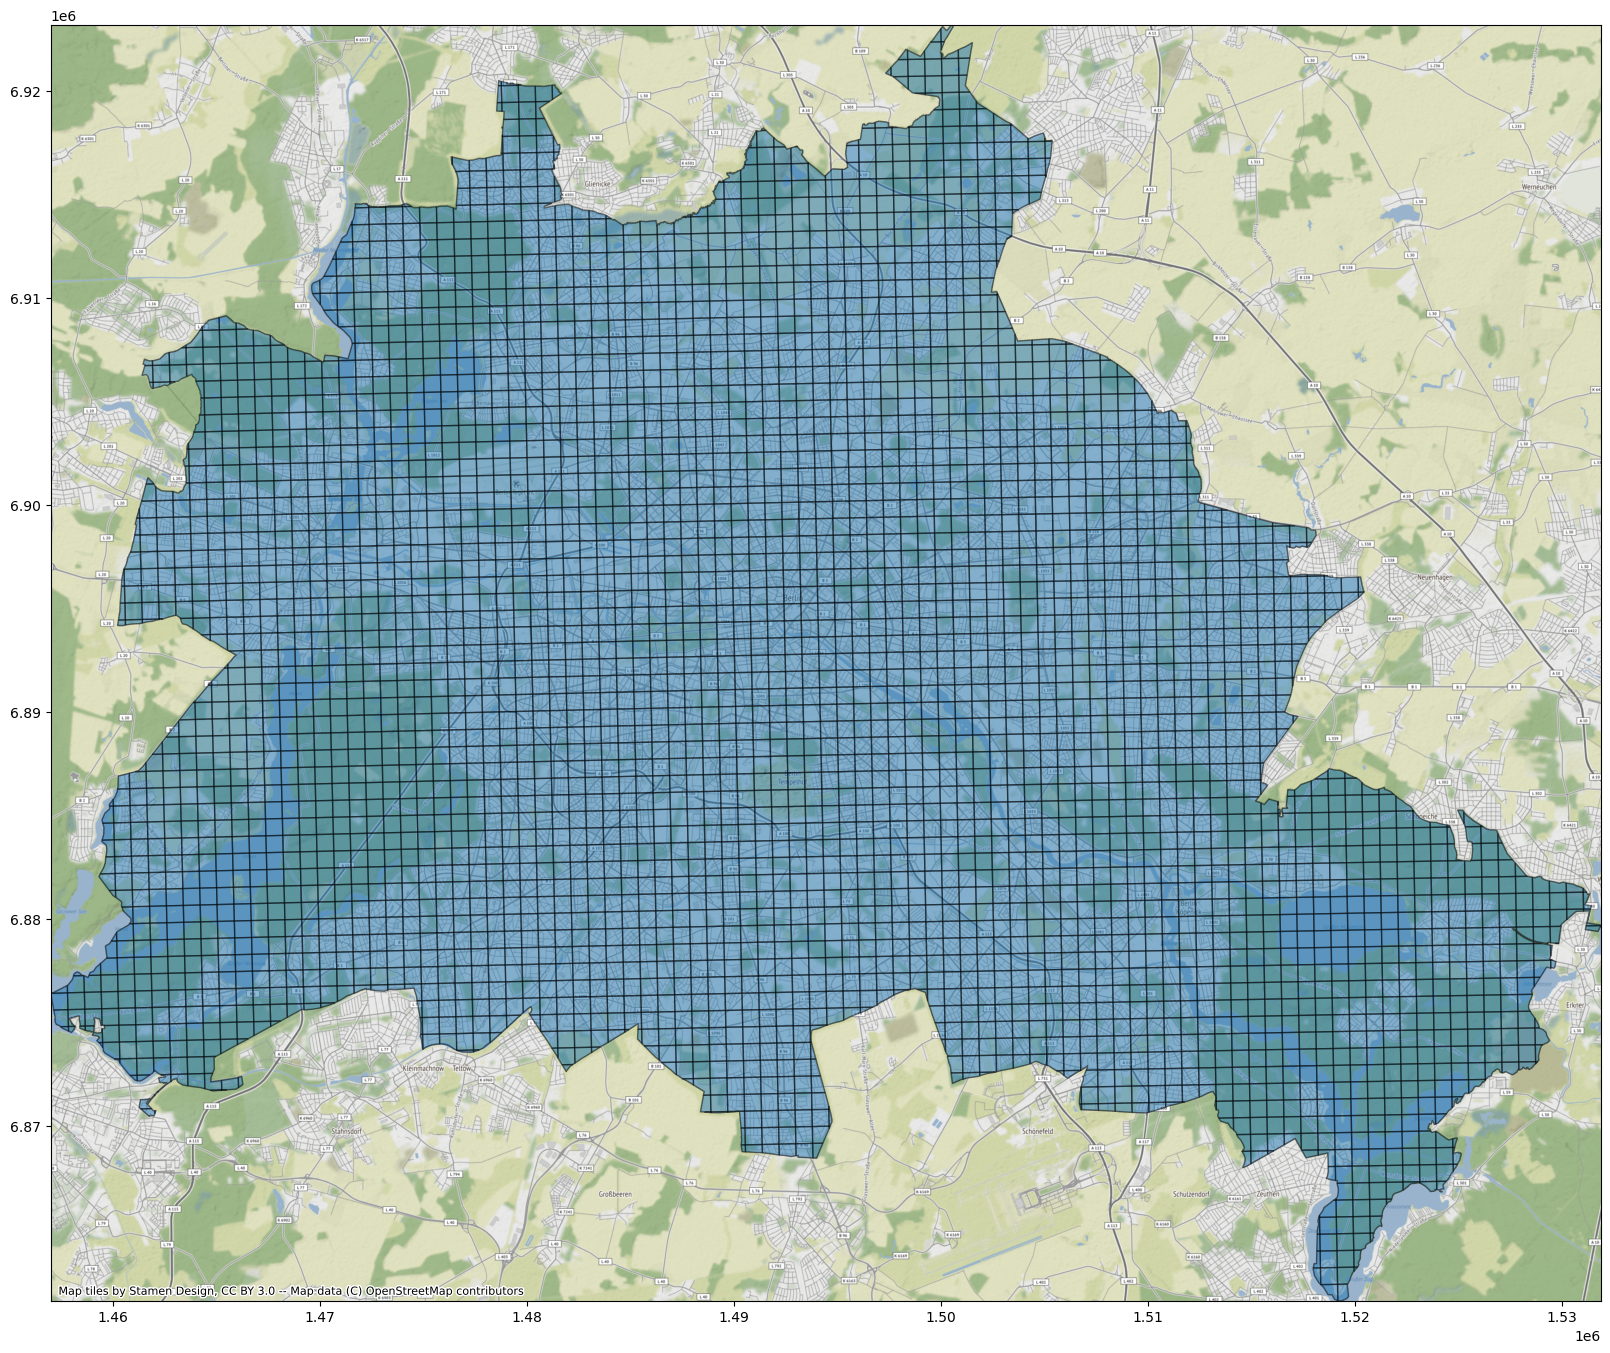

In [9]:
city_polyframe = gpd.GeoDataFrame(geometry=polylist)
city_polyframe.crs = city.crs
print(city_polyframe.crs)
city_polyframe.head()

import contextily as ctx
# ctx uses epsg:3857ax = city.plot()
polyframe_3857 = city_polyframe.to_crs(epsg=3857)
west, south, east, north = polyframe_3857.unary_union.bounds

ax = polyframe_3857.plot(figsize=(20,20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=13)
ax.set_xlim(west, east)
ax.set_ylim(south, north)

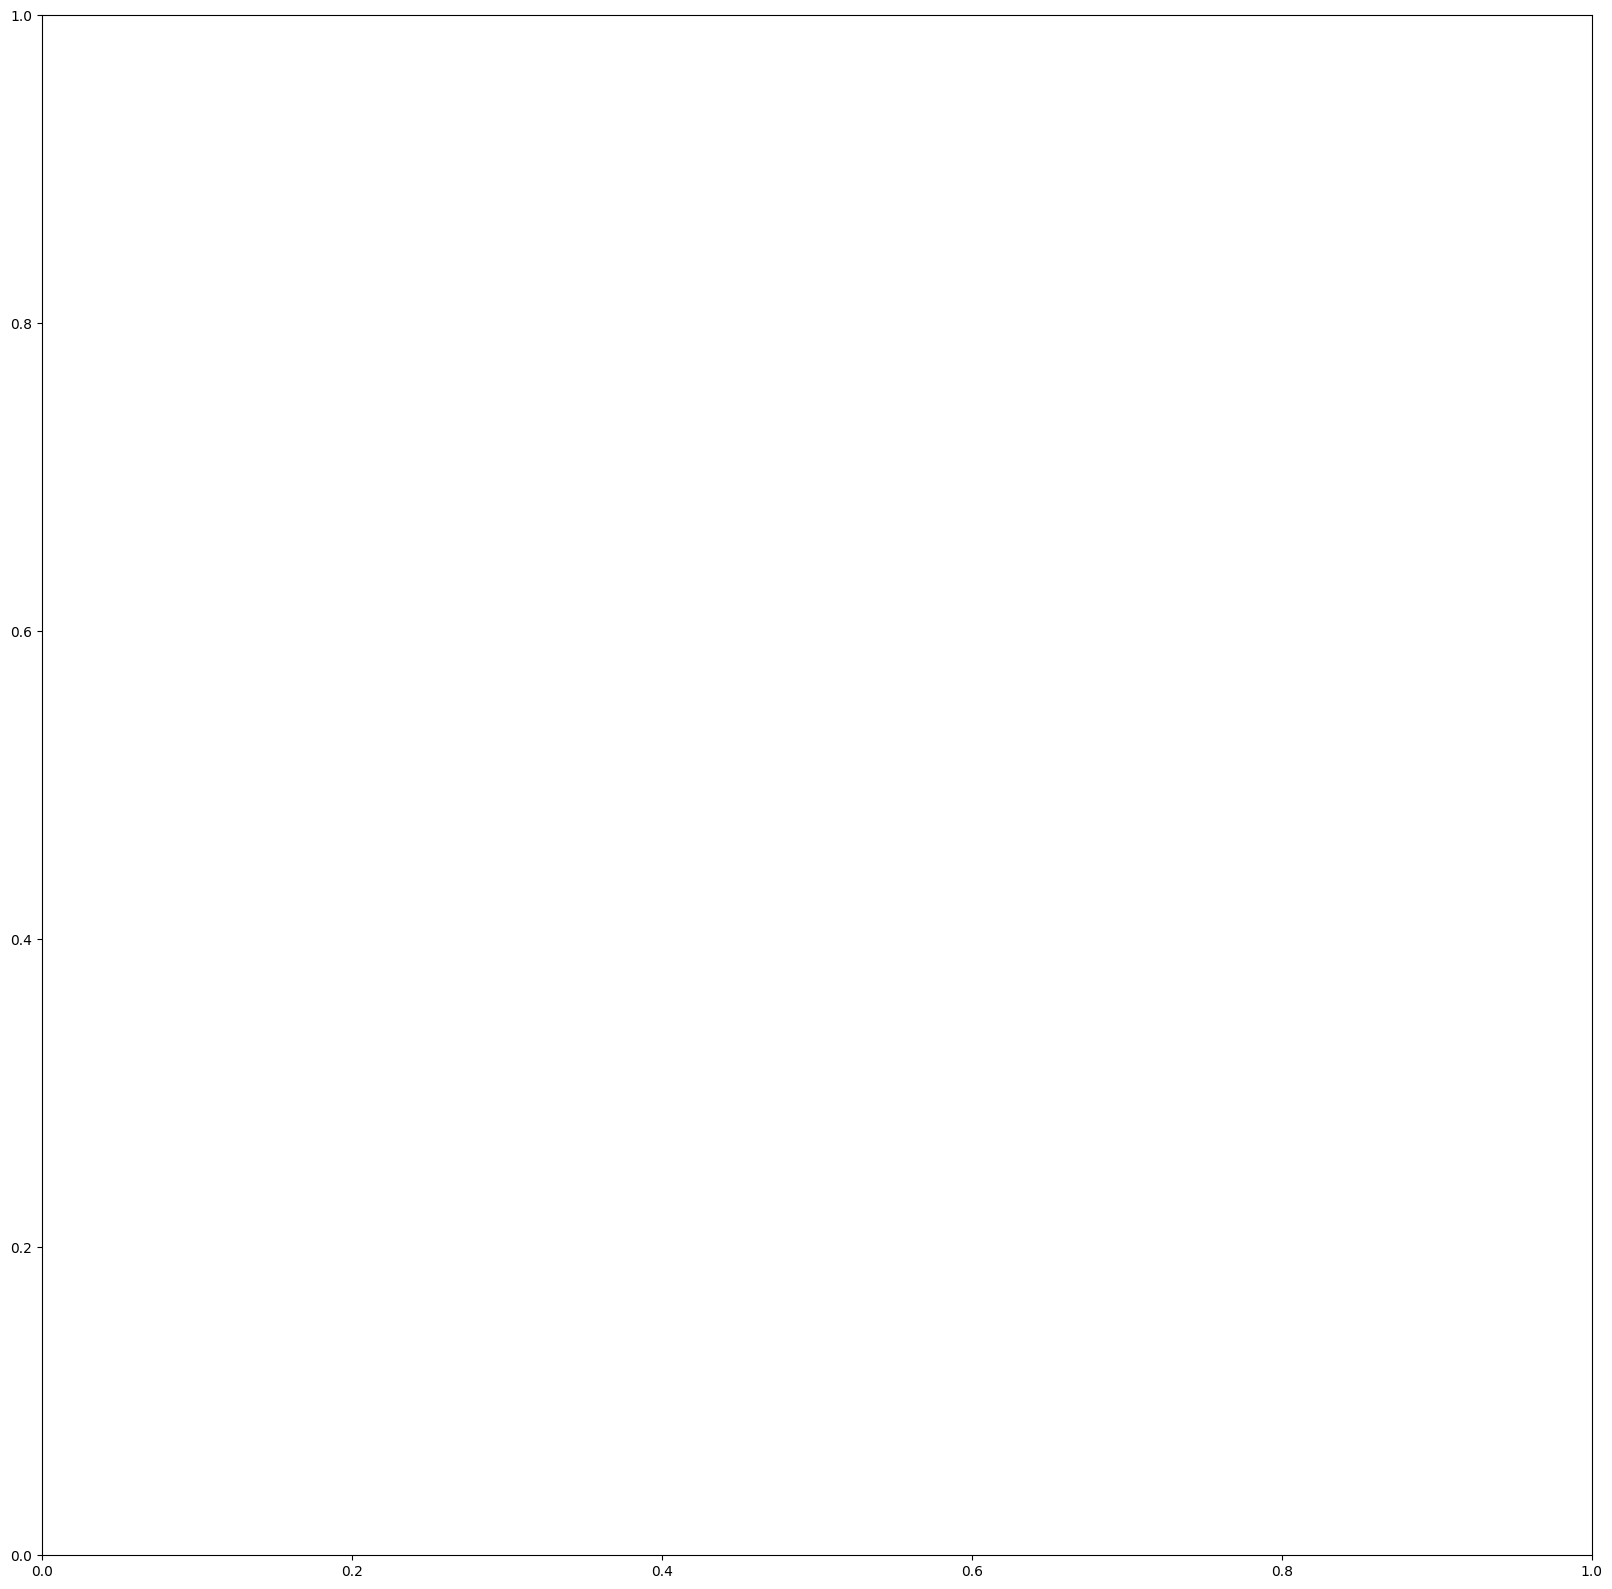

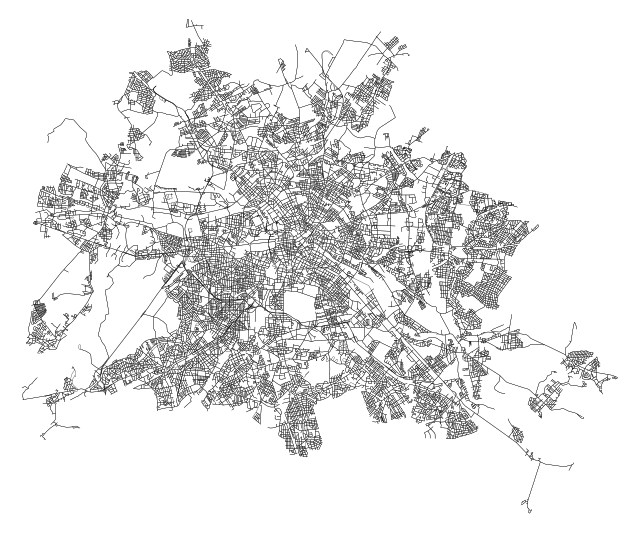

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [27]:
#plot road network of Berlin
city = ox.graph_from_place(PLACE_NAME_list[0], network_type='drive')
ox.plot_graph(city, node_size=0, edge_color='k', edge_linewidth=0.2, bgcolor='w')

In [14]:
#plot landuse of Berlin
fig, ax = plt.subplots(figsize=(20,20))
city = ox.geocode_to_gdf(PLACE_NAME_list[0])


In [18]:
#pllot population density of Berlin
fig, ax = plt.subplots(figsize=(20,20))


<Figure size 640x480 with 0 Axes>

(<Figure size 2000x2000 with 2 Axes>,
 <AxesSubplot:title={'center':'Saarbrücken, Saarland, Germany'}>)